# 참고 자료
### https://www.youtube.com/watch?v=ovF9-RqiKA8&list=PLVsNizTWUw7E2RxZ4aspcR9vNamXccmFE&index=8
### https://www.youtube.com/watch?v=4Yo297HQyAk
### https://www.youtube.com/watch?v=LenyNerCyqU

![alt text](<스크린샷 2025-06-21 170516-1.png>)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.7, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3) #hyperparameter, K value

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

train_input,test_input,train_target,test_target=train_test_split(perch_length.reshape(-1,1),perch_weight.reshape(-1,1),test_size=0.2,random_state=42)

In [6]:
train_target

array([[ 250.],
       [ 300.],
       [  85.],
       [ 135.],
       [  78.],
       [  70.],
       [ 700.],
       [ 180.],
       [ 850.],
       [ 820.],
       [1000.],
       [ 120.],
       [  85.],
       [ 130.],
       [ 225.],
       [ 260.],
       [1100.],
       [ 900.],
       [ 145.],
       [ 115.],
       [ 265.],
       [1015.],
       [ 514.],
       [ 218.],
       [ 685.],
       [  32.],
       [ 145.],
       [  40.],
       [ 690.],
       [ 840.],
       [ 300.],
       [ 170.],
       [ 650.],
       [ 110.],
       [ 150.],
       [ 110.],
       [1000.],
       [ 150.],
       [  80.],
       [ 700.],
       [ 120.],
       [ 197.],
       [1100.],
       [ 556.]])

In [7]:
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

![alt text](<화면 캡처 2025-06-24 153147-1.jpg>)

## 결정계수 R²: 회귀 모델의 설명력을 평가하는 핵심 지표

> **결정계수(Coefficient of Determination, R-squared, R²)**는 회귀 분석에서 독립변수(X)가 종속변수(Y)의 변동성을 얼마나 잘 설명하는지를 나타내는 핵심적인 평가지표입니다. 즉, 만들어진 회귀 모델이 주어진 데이터를 얼마나 잘 대표하는지를 보여주는 '설명력'의 척도라고 할 수 있습니다.

결정계수는 0과 1 사이의 값을 가지며, 이 값이 1에 가까울수록 회귀 모델이 데이터를 완벽하게 설명한다는 것을 의미하고, 0에 가까울수록 설명력이 낮다는 것을 뜻합니다.

---

### 결정계수 R²의 의미와 해석

결정계수 R²의 값은 백분율로 해석할 수 있습니다. 예를 들어, R² 값이 **0.8**이라면 이는 종속변수의 총 변동 중에서 **80%**가 독립변수에 의해 설명된다는 것을 의미합니다. 나머지 20%는 모델에 포함되지 않은 다른 요인이나 무작위적인 오차(error)에 의한 것입니다.

수식적으로 결정계수는 다음과 같이 계산됩니다.

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = \frac{SS_{reg}}{SS_{tot}}$$

여기서 각 항의 의미는 다음과 같습니다.

* **$SS_{tot}$ (총 변동 제곱합, Total Sum of Squares)**: 관측된 종속변수 값(Y)과 Y의 평균값 사이의 차이를 제곱하여 모두 더한 값입니다. 이는 종속변수가 가진 총 변동량을 나타냅니다.
* **$SS_{res}$ (잔차 제곱합, Residual Sum of Squares)**: 실제 관측된 Y값과 회귀 모델이 예측한 Y값 사이의 차이(잔차)를 제곱하여 모두 더한 값입니다. 이는 회귀 모델로 설명되지 않는 변동량을 의미합니다.
* **$SS_{reg}$ (회귀 제곱합, Regression Sum of Squares)**: 회귀 모델이 예측한 Y값과 Y의 평균값 사이의 차이를 제곱하여 모두 더한 값입니다. 이는 회귀 모델에 의해 설명되는 변동량을 나타냅니다. ($SS_{tot} = SS_{reg} + SS_{res}$)

따라서 R²는 **총 변동 중에서 회귀 모델이 설명하는 변동의 비율**을 나타냅니다.

* **R² = 1**: 모든 데이터 포인트가 회귀선 상에 완벽하게 위치하는 경우로, 모델이 데이터의 변동을 100% 설명함을 의미합니다.
* **R² = 0**: 모델이 데이터의 변동을 전혀 설명하지 못함을 의미합니다. 이 경우, X를 아는 것이 Y를 예측하는 데 아무런 도움이 되지 않으며, Y의 평균으로 예측하는 것과 같습니다.

---

### 결정계수 R²의 한계

결정계수는 회귀 모델의 설명력을 직관적으로 파악할 수 있게 해주지만, 몇 가지 중요한 한계점을 가지고 있습니다.

가장 큰 한계점은 **독립변수의 개수가 늘어날수록 R² 값은 항상 증가하거나 최소한 동일하게 유지된다는 것**입니다. 심지어 종속변수와 전혀 관련 없는 변수를 추가하더라도 R² 값은 상승하는 경향이 있습니다. 이는 모델의 복잡도를 증가시켜 **과적합(overfitting)**의 위험을 초래할 수 있습니다. 과적합된 모델은 학습 데이터에 대해서는 높은 설명력을 보이지만, 새로운 데이터에 대한 예측 성능은 오히려 떨어질 수 있습니다.

---

### 조정된 결정계수 (Adjusted R-squared)

이러한 R²의 한계를 보완하기 위해 **조정된 결정계수(Adjusted R-squared)**가 사용됩니다. 조정된 결정계수는 독립변수의 개수를 고려하여 R² 값을 보정합니다.

$$\text{Adjusted } R^2 = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}$$

* **n**: 표본의 크기 (데이터의 개수)
* **p**: 독립변수의 개수

조정된 결정계수는 불필요한 독립변수가 추가될 경우 페널티를 부여하여 값이 감소할 수 있습니다. 따라서 다음과 같은 특징을 가집니다.

* 항상 일반 결정계수 R²보다 작거나 같습니다.
* 유의미하지 않은 변수가 모델에 추가되면 값이 감소할 수 있습니다.
* 모델에 유의미한 변수만을 포함했을 때, 더 객관적인 모델 설명력을 제공합니다.

따라서 다중 회귀 분석(독립변수가 2개 이상인 경우)에서는 일반 결정계수 R²와 함께 조정된 결정계수 값을 반드시 확인하여 모델의 적합성을 종합적으로 판단하는 것이 중요합니다. 조정된 결정계수는 더 나은 모델을 선택하는 데 유용한 기준을 제공합니다.

In [8]:
#Train data score(R2=결정 계수)
knr.score(train_input,train_target)

0.9803764248982696

In [9]:
#Test data score(R2=결정 계수)
knr.score(test_input,test_target)

0.9761346952012298

In [10]:
#Train Data Error
train_mae = mean_absolute_error(train_target,knr.predict(train_input))
train_rmse = root_mean_squared_error(train_target,knr.predict(train_input))
print(train_mae,train_rmse)

29.393939393939387 48.22359538146395


In [11]:
#Test Data Error
test_mae = mean_absolute_error(test_target,knr.predict(test_input))
test_rmse = root_mean_squared_error(test_target,knr.predict(test_input))
print(test_mae,test_rmse)

37.188888888888876 52.72462879415539


![alt text](과소적합,과대적합_KNR-2.png)

# 50cm 농어 무게 예측하기

In [12]:
knr.predict([[50]])

array([[1033.33333333]])

In [13]:
#50cm의 농어의 이웃을 구합니다.
distance,index=knr.kneighbors([[50]])

In [14]:
distance

array([[6. , 6.3, 7. ]])

In [15]:
index

array([[36, 16, 10]], dtype=int64)

In [16]:
#50cm 농어의 이웃(3개)의 무게값 확인
print(train_target[index])
#50cm 농어의 이웃(3개)의 무게 평균값 확인
average=np.mean(train_target[index])
print(average)

[[[1000.]
  [1100.]
  [1000.]]]
1033.3333333333333


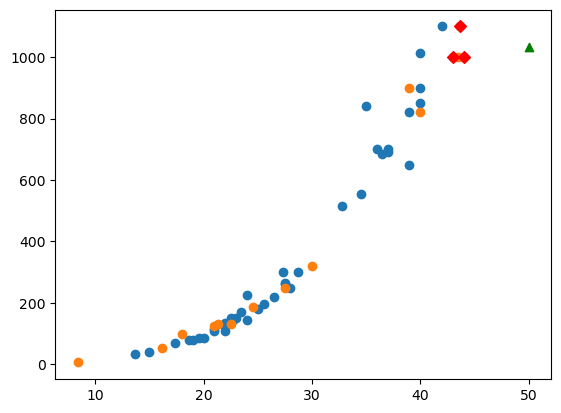

In [17]:
#전체 농어 산점도 그리기
plt.scatter(train_input,train_target)
plt.scatter(test_input,test_target)
#50g의 이웃 산점도 그리기(3개) - Red Diamond
plt.scatter(train_input[index],train_target[index],marker='D',c='r')
#50g의 산점도 그리기 - ^ Green
plt.scatter([50],knr.predict([[50]]),marker='^',c='g')
plt.show()

In [18]:
#100cm의 농어의 무게를 구합니다.
print(knr.predict([[100]]))
#100cm의 농어의 이웃을 구합니다.
distance,index=knr.kneighbors([[100]])
print(distance)
print(index)

[[1033.33333333]]
[[56.  56.3 57. ]]
[[36 16 10]]


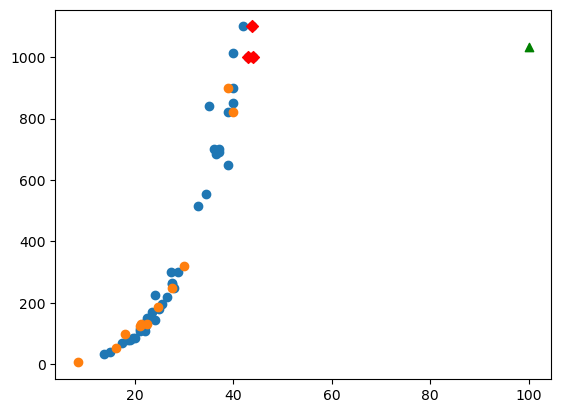

In [19]:
#전체 농어 산점도 그리기
plt.scatter(train_input,train_target)
plt.scatter(test_input,test_target)
#50g의 이웃 산점도 그리기(3개) - Red Diamond
plt.scatter(train_input[index],train_target[index],marker='D',c='r')
#100cm의 산점도 그리기 - ^ Green
plt.scatter([100],knr.predict([[100]]),marker='^',c='g')
plt.show()

![alt text](<화면 캡처 2025-06-22 162825-1.jpg>)

# 한계점 극복 방안
## Linear Regression

![alt text](<선형 회귀_1-1.jpg>)

![alt text](<스크린샷 2025-06-21 170516-1.png>)

In [20]:
from sklearn.linear_model import LinearRegression


In [21]:
#LinearRegression 모델 생성
lr = LinearRegression()

In [22]:
#LinearRegression 모델 훈련
lr.fit(train_input,train_target)

LinearRegression()

In [23]:
#50cm의 농어의 무게를 LinearRegression 모델로 예측하기
lr.predict([[50]])

array([[1235.53314502]])

In [24]:
print(f"기울기 : {lr.coef_}, 절편 : {lr.intercept_}")
#linearReression의 기울기와 절편을 이용해서 계산하기(입력값:50cm)
cal_lr_50 = lr.coef_*[[50]]+lr.intercept_
print(f"계산된 50cm 농어의 무게는 {cal_lr_50}입니다.")

기울기 : [[38.95339553]], 절편 : [-712.13663171]
계산된 50cm 농어의 무게는 [[1235.53314502]]입니다.


![alt text](<화면 캡처 2025-06-22 181826-1.jpg>)

In [88]:
x = np.arange(15,51).reshape(-1,1)
x

array([[15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50]])

In [89]:
y = lr.coef_*x+lr.intercept_.reshape(-1,1)
y

array([[-127.83569869],
       [ -88.88230315],
       [ -49.92890762],
       [ -10.97551209],
       [  27.97788345],
       [  66.93127898],
       [ 105.88467452],
       [ 144.83807005],
       [ 183.79146559],
       [ 222.74486112],
       [ 261.69825666],
       [ 300.65165219],
       [ 339.60504773],
       [ 378.55844326],
       [ 417.5118388 ],
       [ 456.46523433],
       [ 495.41862987],
       [ 534.3720254 ],
       [ 573.32542093],
       [ 612.27881647],
       [ 651.232212  ],
       [ 690.18560754],
       [ 729.13900307],
       [ 768.09239861],
       [ 807.04579414],
       [ 845.99918968],
       [ 884.95258521],
       [ 923.90598075],
       [ 962.85937628],
       [1001.81277182],
       [1040.76616735],
       [1079.71956289],
       [1118.67295842],
       [1157.62635396],
       [1196.57974949],
       [1235.53314502]])

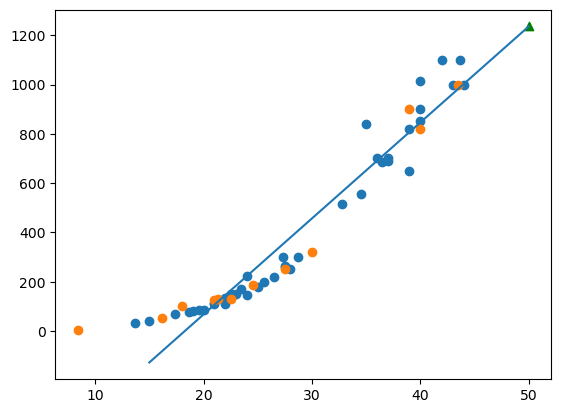

In [90]:
#전체 농어 산점도 그리기
plt.scatter(train_input,train_target)
plt.scatter(test_input,test_target)
#linearRegression 그리기([15,-94] ~ [50,1197])
plt.plot(x,y)
#plt.plot(np.array([15,50]),np.array([50,100]))
#50cm의 산점도 그리기 - ^ Green
plt.scatter([50],lr.predict([[50]]),marker='^',c='g')
plt.show()

# Linear Regression의 문제점

In [29]:
#knr의 score(R2,결정 계수 확인)
knr_train = knr.score(train_input,train_target)
knr_test = knr.score(test_input,test_target)
print(f"KNR Train 결정 계수:  {knr_train}")
print(f"KNR Test 결정 계수:  {knr_test}")
#lr의 score(R2,결정 계수 확인)
lr_train = lr.score(train_input,train_target)
lr_test = lr.score(test_input,test_target)
print(f"LR Train 결정 계수:  {lr_train}")
print(f"LR Test 결정 계수:  {lr_test}")

KNR Train 결정 계수:  0.9803764248982696
KNR Test 결정 계수:  0.9761346952012298
LR Train 결정 계수:  0.9376286815988712
LR Test 결정 계수:  0.8369797774619284


In [30]:
train_min = np.array(train_input.min()).reshape(1,-1)
train_min

array([[13.7]])

In [31]:
# 음수값이 예측된다.(13.7cm의 LR 예측값)
lr_min_predict = lr.predict(train_min)
knr_min_predict = knr.predict(train_min)
print(f"LR 13.7cm 예측값:  {lr_min_predict}")
print(f"KNR 13.7cm 예측값:  {knr_min_predict}")

LR 13.7cm 예측값:  [[-178.47511288]]
KNR 13.7cm 예측값:  [[47.33333333]]


![alt text](<화면 캡처 2025-06-24 160803-1.jpg>)

In [32]:
train_input

array([[28. ],
       [27.3],
       [19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43.7],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [33]:
train_input**2

array([[ 784.  ],
       [ 745.29],
       [ 384.16],
       [ 484.  ],
       [ 349.69],
       [ 302.76],
       [1296.  ],
       [ 625.  ],
       [1600.  ],
       [1521.  ],
       [1849.  ],
       [ 484.  ],
       [ 400.  ],
       [ 484.  ],
       [ 576.  ],
       [ 756.25],
       [1909.69],
       [1600.  ],
       [ 576.  ],
       [ 441.  ],
       [ 756.25],
       [1600.  ],
       [1075.84],
       [ 702.25],
       [1332.25],
       [ 187.69],
       [ 515.29],
       [ 225.  ],
       [1369.  ],
       [1225.  ],
       [ 823.69],
       [ 552.25],
       [1521.  ],
       [ 441.  ],
       [ 529.  ],
       [ 484.  ],
       [1936.  ],
       [ 506.25],
       [ 361.  ],
       [1369.  ],
       [ 484.  ],
       [ 655.36],
       [1764.  ],
       [1190.25]])

In [47]:
train_poly = np.column_stack((train_input**2,train_input))
train_poly

array([[ 784.  ,   28.  ],
       [ 745.29,   27.3 ],
       [ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1909.69,   43.7 ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
 

In [48]:
test_poly = np.column_stack((test_input**2,test_input))
test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ]])

In [49]:
#LinearRegression 모델 생성
lr_poly = LinearRegression()

In [50]:
lr_poly.fit(train_poly,train_target)

LinearRegression()

In [52]:
#50cm의 농어의 무게를 LinearRegression_poly 모델로 예측하기
lr_poly.predict([[50**2,50]])

array([[1564.30322632]])

![alt text](<화면 캡처 2025-06-28 112937-1.jpg>)

In [65]:
print(f"기울기 : {lr_poly.coef_}, 절편 : {lr_poly.intercept_}")
#linearReression의 기울기와 절편을 이용해서 계산하기(입력값:50cm)
cal_lr_poly_50 = lr_poly.coef_[0][0]*(50**2) + lr_poly.coef_[0][1]*50+lr_poly.intercept_
print(f"계산된 50cm 농어의 무게는 {cal_lr_poly_50}입니다.")

기울기 : [[  1.00472874 -21.19378581]], 절편 : [112.17067192]
계산된 50cm 농어의 무게는 [1564.30322632]입니다.


In [67]:
print(lr_poly.coef_[0][0])
print(lr_poly.coef_[0][1])

1.0047287380350893
-21.193785813728535


In [93]:
x_poly = np.arange(15,51).reshape(-1,1)
y_poly = lr_poly.coef_[0][0]*(x_poly**2) + lr_poly.coef_[0][1]*x_poly + lr_poly.intercept_

In [94]:
x_poly

array([[15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50]])

In [95]:
y_poly

array([[  20.32785077],
       [  30.28065583],
       [  42.24291838],
       [  56.21463839],
       [  72.19581589],
       [  90.18645086],
       [ 110.1865433 ],
       [ 132.19609322],
       [ 156.21510062],
       [ 182.2435655 ],
       [ 210.28148785],
       [ 240.32886767],
       [ 272.38570497],
       [ 306.45199975],
       [ 342.52775201],
       [ 380.61296174],
       [ 420.70762894],
       [ 462.81175363],
       [ 506.92533578],
       [ 553.04837542],
       [ 601.18087253],
       [ 651.32282712],
       [ 703.47423918],
       [ 757.63510872],
       [ 813.80543573],
       [ 871.98522022],
       [ 932.17446219],
       [ 994.37316163],
       [1058.58131855],
       [1124.79893295],
       [1193.02600482],
       [1263.26253417],
       [1335.50852099],
       [1409.76396529],
       [1486.02886707],
       [1564.30322632]])

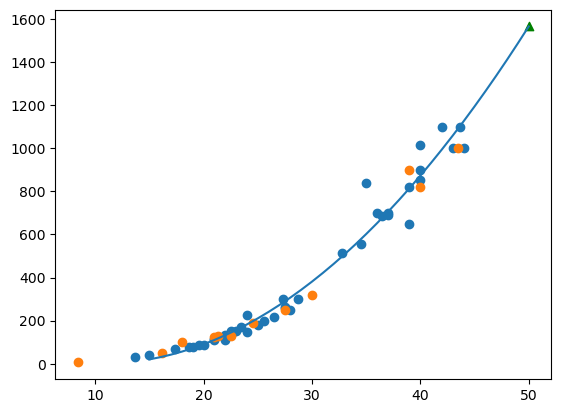

In [96]:
#전체 농어 산점도 그리기
plt.scatter(train_input,train_target)
plt.scatter(test_input,test_target)
#linearRegression 그리기([15,-94] ~ [50,1197])
plt.plot(x_poly,y_poly)
#plt.plot(np.array([15,50]),np.array([50,100]))
#50cm의 산점도 그리기 - ^ Green
plt.scatter([50],lr_poly.predict([[50**2,50]]),marker='^',c='g')
plt.show()

In [98]:
#knr의 score(R2,결정 계수 확인)
knr_train = knr.score(train_input,train_target)
knr_test = knr.score(test_input,test_target)
print(f"KNR Train 결정 계수:  {knr_train}")
print(f"KNR Test 결정 계수:  {knr_test}")

#lr의 score(R2,결정 계수 확인)
lr_train = lr.score(train_input,train_target)
lr_test = lr.score(test_input,test_target)
print(f"LR Train 결정 계수:  {lr_train}")
print(f"LR Test 결정 계수:  {lr_test}")

#lr_poly의 score(R2,결정 계수 확인)
lr_train_poly = lr_poly.score(train_poly,train_target)
lr_test_poly = lr_poly.score(test_poly,test_target)
print(f"LR_poly Train 결정 계수:  {lr_train_poly}")
print(f"LR_poly Test 결정 계수:  {lr_test_poly}")

KNR Train 결정 계수:  0.9803764248982696
KNR Test 결정 계수:  0.9761346952012298
LR Train 결정 계수:  0.9376286815988712
LR Test 결정 계수:  0.8369797774619284
LR_poly Train 결정 계수:  0.9704492264309341
LR_poly Test 결정 계수:  0.9809048260174702
